# Header

In [11]:
# Triqs imports
from triqs.plot.mpl_interface import *
from h5 import *
from triqs.gf import *
from triqs.operators import *

# Tools
from math import *
from itertools import *
import numpy as np

# Ctint
from ctint import SolverCore

# Redirect the output of the C++ solver to the notebook
#from triqs.utility.redirect import *
#start_redirect()

%matplotlib inline

# Benchmark Hubbard Atom

In [17]:
# Parameters
U = 2.0
beta = 1.0
mu = U/2.0
n_iw = 20

# The Hamiltonian of the Hubbard Atom
h_int = U * n('up',0)*n('down',0)

# The alpha shift : alpha[block][index,s]
delta = 0.3
diag = 0.5 + delta
odiag = 0.5 - delta
alpha = [ [[diag,odiag]], [[odiag,diag]] ]

# The Green function structure
gf_struct = { 'up':[0], 'down':[0] }

# Construct the CTINT
from ctint import SolverCore
S = SolverCore(beta = beta,
               gf_struct = gf_struct,
               n_iw = n_iw,
               n_tau = 100001 )

# Initialize the non-interacting Green's function
for name ,g0 in S.G0_iw:
    g0 << inverse(iOmega_n + mu);
    
# Run the QMC
S.solve(h_int=h_int,
        alpha = alpha,
        n_cycles = 10000000,
        length_cycle = 50,
        n_warmup_cycles = 10000,
        measure_M_tau = True,
        post_process = True )

# Print average sign
print(S.average_sign)

1.0


(-30, 30)

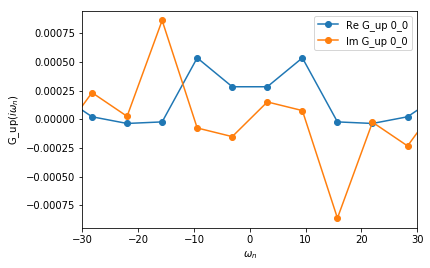

In [18]:
# Plot the difference to the exact result
Sigma_exact = GfImFreq( indices=[0], beta = beta, name = 'exact', n_points = n_iw)
Sigma_exact << U/2.0 + U * U / 4.0 * inverse(iOmega_n)

oplot(S.Sigma_iw['up'] - Sigma_exact, '-o')
plt.xlim(-30,30)